### 1. Método de Adams-Bashforth-Moulton para um PVI com uma EDO;


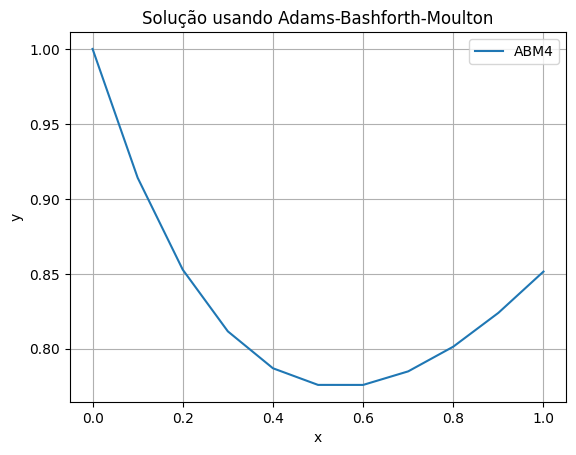

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x - 2*y + 1

def dopri(a, b, h, y0):
    VetX = np.arange(a, b + h, h)
    VetY = np.zeros(len(VetX))
    VetY[0] = y0
    for i in range(1, 4):
        k1 = h * f(VetX[i-1], VetY[i-1])
        k2 = h * f(VetX[i-1] + h/2, VetY[i-1] + k1/2)
        k3 = h * f(VetX[i-1] + h/2, VetY[i-1] + k2/2)
        k4 = h * f(VetX[i-1] + h, VetY[i-1] + k3)
        VetY[i] = VetY[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return VetX, VetY

def abm4(a, b, m, y0):
    h = (b - a) / m
    VetX, VetY = dopri(a, a + 3 * h, h, y0)
    erro = []
    
    for i in range(3, m):
        x = VetX[i]
        y = VetY[i]
        
        f0 = f(VetX[i-3], VetY[i-3])
        f1 = f(VetX[i-2], VetY[i-2])
        f2 = f(VetX[i-1], VetY[i-1])
        f3 = f(x, y)
        
        Ypre = y + h * (55 * f3 - 59 * f2 + 37 * f1 - 9 * f0) / 24
        VetX = np.append(VetX, x + h)
        VetY = np.append(VetY, Ypre)
        
        f4 = f(VetX[-1], Ypre)
        Ycor = y + h * (9 * f4 + 19 * f3 - 5 * f2 + f1) / 24
        
        erro.append(abs(Ycor - Ypre) * 19 / 270)
        
        VetY[-1] = Ycor
        
    return VetX, VetY, erro

a, b = 0, 1  
m = 10  
y0 = 1  

VetX, VetY, erro = abm4(a, b, m, y0)


plt.plot(VetX, VetY, label="ABM4")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solução usando Adams-Bashforth-Moulton")
plt.legend()
plt.grid(True)
plt.show()


### 2. Método de Adams-Bashforth-Moulton para um PVI com um sistema de duas EDO’s

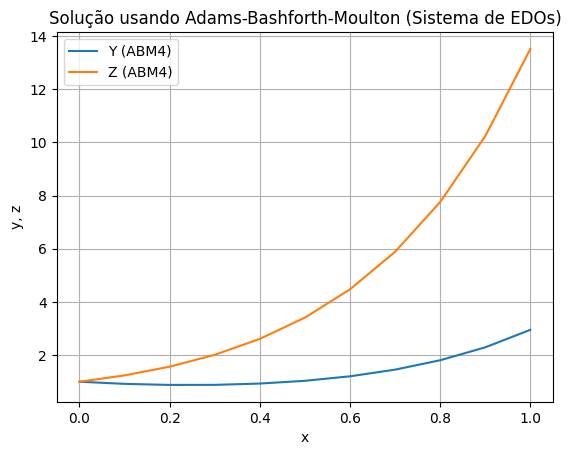

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def f1(x, y, z):
    return -2 * y + z 

def f2(x, y, z):
    return -y + 3 * z 

def dopri_system(a, b, h, y0, z0):
    VetX = np.arange(a, b + h, h)
    VetY = np.zeros(len(VetX))
    VetZ = np.zeros(len(VetX))
    VetY[0], VetZ[0] = y0, z0
    
    for i in range(1, 4):
        k1y = h * f1(VetX[i-1], VetY[i-1], VetZ[i-1])
        k1z = h * f2(VetX[i-1], VetY[i-1], VetZ[i-1])
        
        k2y = h * f1(VetX[i-1] + h/2, VetY[i-1] + k1y/2, VetZ[i-1] + k1z/2)
        k2z = h * f2(VetX[i-1] + h/2, VetY[i-1] + k1y/2, VetZ[i-1] + k1z/2)
        
        k3y = h * f1(VetX[i-1] + h/2, VetY[i-1] + k2y/2, VetZ[i-1] + k2z/2)
        k3z = h * f2(VetX[i-1] + h/2, VetY[i-1] + k2y/2, VetZ[i-1] + k2z/2)
        
        k4y = h * f1(VetX[i-1] + h, VetY[i-1] + k3y, VetZ[i-1] + k3z)
        k4z = h * f2(VetX[i-1] + h, VetY[i-1] + k3y, VetZ[i-1] + k3z)
        
        VetY[i] = VetY[i-1] + (k1y + 2*k2y + 2*k3y + k4y) / 6
        VetZ[i] = VetZ[i-1] + (k1z + 2*k2z + 2*k3z + k4z) / 6
    
    return VetX, VetY, VetZ

def abm4_system(a, b, m, y0, z0):
    h = (b - a) / m
    VetX, VetY, VetZ = dopri_system(a, a + 3 * h, h, y0, z0)
    erro = []
    
    for i in range(3, m):
        x = VetX[i]
        y, z = VetY[i], VetZ[i]
        
        f0y = f1(VetX[i-3], VetY[i-3], VetZ[i-3])
        f0z = f2(VetX[i-3], VetY[i-3], VetZ[i-3])
        
        f1y = f1(VetX[i-2], VetY[i-2], VetZ[i-2])
        f1z = f2(VetX[i-2], VetY[i-2], VetZ[i-2])
        
        f2y = f1(VetX[i-1], VetY[i-1], VetZ[i-1])
        f2z = f2(VetX[i-1], VetY[i-1], VetZ[i-1])
        
        f3y = f1(x, y, z)
        f3z = f2(x, y, z)
        
        Ypre = y + h * (55 * f3y - 59 * f2y + 37 * f1y - 9 * f0y) / 24
        Zpre = z + h * (55 * f3z - 59 * f2z + 37 * f1z - 9 * f0z) / 24
        
        VetX = np.append(VetX, x + h)
        VetY = np.append(VetY, Ypre)
        VetZ = np.append(VetZ, Zpre)
        
        f4y = f1(VetX[-1], Ypre, Zpre)
        f4z = f2(VetX[-1], Ypre, Zpre)
        
        Ycor = y + h * (9 * f4y + 19 * f3y - 5 * f2y + f1y) / 24
        Zcor = z + h * (9 * f4z + 19 * f3z - 5 * f2z + f1z) / 24
        
        erro.append((abs(Ycor - Ypre) + abs(Zcor - Zpre)) * 19 / 270)
        
        VetY[-1] = Ycor
        VetZ[-1] = Zcor
    
    return VetX, VetY, VetZ, erro

a, b = 0, 1  
m = 10  
y0, z0 = 1, 1

VetX, VetY, VetZ, erro = abm4_system(a, b, m, y0, z0)

plt.plot(VetX, VetY, label="Y (ABM4)")
plt.plot(VetX, VetZ, label="Z (ABM4)")
plt.xlabel("x")
plt.ylabel("y, z")
plt.title("Solução usando Adams-Bashforth-Moulton (Sistema de EDOs)")
plt.legend()
plt.grid(True)
plt.show()